<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo2_Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from datetime import date
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [2]:
# configurando cores de fundo dos gráfico
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['legend.edgecolor'] = 'grey'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
sns.set_palette("dark")

In [3]:
# preparando a base: lendo arquivo, incluindo região e ajustando nome dos estados
# importando os números
dados = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# criando o campo do códgio da região
dados["Cod_Região"]=dados["Unidade da Federação"].str[0]
# inclui os nomes das regiões
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")
# inclui os nomes das regiões em dados
dados = dados.join(Base_regioes, on="Cod_Região")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
#verificando a marcação de Região
dados[["Região","Unidade da Federação","Total"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região,Unidade da Federação,Total
0,Norte,Rondônia,"1,073,782,138.81"
1,Norte,Acre,"475,290,315.34"
2,Norte,Amazonas,"2,041,003,727.86"
3,Norte,Roraima,"349,395,453.66"
4,Norte,Pará,"4,950,135,530.02"
5,Norte,Amapá,"326,885,943.09"
6,Norte,Tocantins,"1,109,478,655.20"
7,Nordeste,Maranhão,"4,120,818,450.35"
8,Nordeste,Piauí,"2,426,540,822.88"
9,Nordeste,Ceará,"7,018,565,512.36"


In [4]:
#selecionando as colunas
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL e Cod_Região
del col_usaveis[-2:]
# excluindo colunas iniciais com valores distorcidos
del col_usaveis[1:7]
# confirmando se realmente foram excluidas
# col_usaveis[-5:]
col_usaveis[:5]

['Unidade da Federação', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai']

In [5]:
# criando a série do último mês disponível e ordena por valor
base_usavel = dados[col_usaveis] # pega apenas as colunas completas
base_usavel = base_usavel.set_index("Unidade da Federação") # define o index dessa nova base
ultimoMes = base_usavel.iloc[:,-1:] # cria a série pegando apenas o último mês
ultimoMes = ultimoMes.sort_values(by=ultimoMes.columns[0], ascending=False) # ordena pelo valor do mês
# validações
# ultimoMes.tail()
ultimoMes.head()

,2021/Jul
Unidade da Federação,
São Paulo,"305,314,678.98"
Minas Gerais,"154,160,802.91"
Paraná,"102,067,382.02"
Rio Grande do Sul,"88,897,808.64"
Rio de Janeiro,"86,682,141.36"


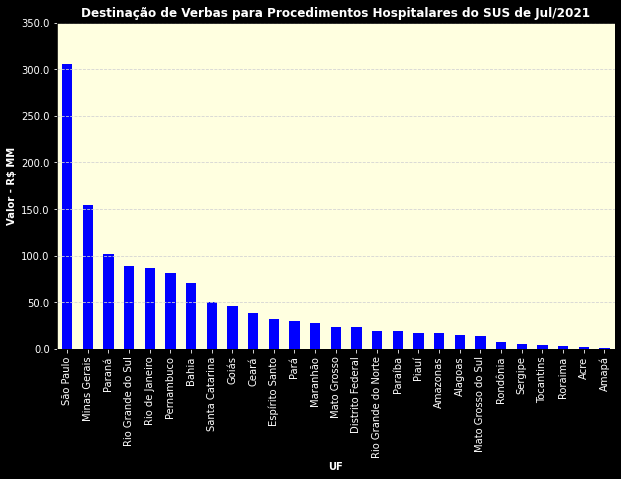

In [6]:
# Construindo grafico dos 5 estados com maior valor
ax = ultimoMes.plot(figsize=(10,6), kind="bar", legend=False, color ="b")
ax.set_facecolor("lightyellow")
# ajustando escala do eixo 
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))

ax.set_ylim(0, 350*escalaY) # definindo limites do eixo y
ax.yaxis.grid(color='lightgrey', linestyle="--") # incluindo a linha no eixo y
# definindo titulos do gráfico e dos exios
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.xlabel("UF", fontweight="bold", color="white")
plt.title("Destinação de Verbas para Procedimentos Hospitalares do SUS de Jul/2021", fontweight="bold", color="white")
plt.show()

In [7]:
meses = {"Jan":1,"Fev":2,"Mar":3,"Abr":4,"Mai":5,"Jun":6,"Jul":7,"Ago":8,"Set":9,"Out":10,"Nov":11,"Dez":12}
from datetime import date
def converte_data(anomes):
  ano = int(anomes[:4])
  mes = meses[anomes[5:]]
  return date(ano,mes,1)

In [8]:
base_ajustada = base_usavel
base_ajustada.columns = base_ajustada.columns.map(converte_data)
base_ajustada.head()

,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,...,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,"1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58","2,624,542.97","2,973,421.02","2,938,286.29","2,843,930.91","2,878,153.20","2,780,022.62","2,651,804.89","3,147,566.24","3,082,108.12","4,190,355.33","4,040,251.62","3,946,423.71","3,372,377.96","3,720,608.86","3,787,323.26","3,679,369.94","3,866,146.99","3,667,808.60","3,633,471.79","3,812,315.59","3,911,776.03","4,663,060.75","4,524,544.88","4,778,755.26","4,369,733.23","4,632,439.12","4,464,307.47","4,668,642.02","4,490,368.23","4,423,840.08","4,384,430.09","4,173,529.95","4,293,085.61","4,674,947.02","5,087,527.81","4,724,192.54",...,"8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,328,381.43","8,431,334.62","7,251,287.20","7,491,953.39","8,962,121.79","11,069,824.97","10,608,659.34","11,578,639.50","9,017,298.72","8,280,299.95","8,908,581.36","9,462,158.24","10,036,160.84","10,558,973.83","17,936,150.41","17,544,666.46","17,200,302.44","12,586,384.26","7,427,454.01"
Acre,"1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15","2,500,589.76","2,749,521.65","2,473,515.82","2,801,446.23","2,672,803.31","3,135,521.30",...,"2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,648.64","3,267,918.69","3,497,348.48","3,820,865.83","4,175,526.06","5,282,655.42","5,699,597.78","5,002,272.59","4,326,882.24","3,458,187.11","2,302,711.01"
Amazonas,"7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15","8,646,295.77","8,755,806.50","8,331,763.97","8,148,089.92","7,681,661.02","7,761,445.21","7,764,782.66","8,607,222.74","8,385,962.92","9,207,129.28","8,160,517.20","8,562,322.43","9,484,998.71","9,465,068.52","9,267,006.58","9,092,823.55","9,218,407.34","8,674,068.02","8,365,788.46","9,386,945.03","8,373,048.81","10,321,150.01","9,990,164.13","9,767,161.23","9,151,838.50","9,140,196.88","9,437,224.41","9,742,680.49","9,996,686.44","9,532,878.27","9,335,803.05","9,800,511.52","9,461,664.54","10,954,545.77","

In [9]:
base_ajustada = base_ajustada.reset_index().melt(id_vars="Unidade da Federação", value_vars=base_ajustada.columns)
base_ajustada.columns = ["uf", "mes", "gasto"]
base_ajustada.head()

,uf,mes,gasto
0,Rondônia,2008-02-01,"1,940,792.63"
1,Acre,2008-02-01,"1,743,978.66"
2,Amazonas,2008-02-01,"7,934,652.10"
3,Roraima,2008-02-01,"771,687.83"
4,Pará,2008-02-01,"20,126,081.01"


In [10]:
base_retorno = base_ajustada.pivot(index="uf", columns="mes", values="gasto")
base_retorno.head()

mes,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,...,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01,2021-04-01,2021-05-01,2021-06-01,2021-07-01
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,"1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93","2,112,576.82","2,029,128.01","1,886,871.84","2,084,884.80","2,230,838.45","2,122,013.12","2,196,651.69","2,152,239.30","2,086,775.61","2,476,364.26","2,396,887.63","2,610,261.80","2,174,098.10","2,051,885.16","1,714,707.91","1,341,532.34","2,288,458.90","2,462,712.79","2,254,900.20","2,381,535.93","2,079,981.05","2,564,837.77","2,588,318.06","2,538,525.67","2,319,786.41","2,279,156.60","2,454,599.37","2,578,923.75","2,625,443.29","2,512,995.15","2,500,589.76","2,749,521.65","2,473,515.82","2,801,446.23","2,672,803.31","3,135,521.30",...,"2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,276,790.55","2,985,763.71","2,939,675.20","2,672,857.33","2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,648.64","3,267,918.69","3,497,348.48","3,820,865.83","4,175,526.06","5,282,655.42","5,699,597.78","5,002,272.59","4,326,882.24","3,458,187.11","2,302,711.01"
Alagoas,"8,112,220.30","9,210,505.56","10,466,691.94","9,844,096.03","10,307,247.08","9,385,440.40","9,262,767.68","9,228,201.96","9,464,597.85","9,578,540.01","9,361,247.91","10,121,881.47","8,994,586.40","12,040,996.68","11,651,218.51","11,471,079.17","10,955,769.81","11,345,518.14","11,715,157.35","11,732,050.72","12,050,093.88","11,895,951.83","11,016,104.25","11,200,586.26","10,243,568.76","13,197,956.95","12,543,380.70","13,186,678.00","11,564,476.61","11,698,448.97","12,689,693.74","12,333,599.13","12,248,867.23","12,103,492.69","10,972,429.23","11,056,588.96","11,826,444.96","13,178,546.52","12,260,249.74","13,929,545.92",...,"18,077,005.49","18,191,826.64","16,601,616.44","18,017,803.20","18,221,249.82","16,273,547.19","18,387,186.62","16,253,745.41","14,723,252.84","18,068,485.92","16,437,146.09","16,383,367.36","16,967,319.09","18,401,780.88","16,679,573.91","18,042,827.45","17,668,105.59","17,495,759.86","18,405,778.22","16,437,847.47","15,994,415.78","17,373,002.95","15,313,075.62","16,115,106.83","14,779,206.17","17,254,073.33","18,404,994.61","18,521,410.72","16,737,221.72","17,225,823.34","18,253,885.40","19,160,901.26","18,566,269.71","20,148,769.90","21,519,572.12","30,783,589.10","28,877,022.74","28,777,383.60","21,922,917.70","14,456,357.74"
Amapá,"1,275,063.72","1,177,745.93","1,396,371.51","1,411,520.77","1,420,892.01","1,367,235.47","1,550,340.63","1,550,166.99","1,635,676.50","1,647,903.31","1,649,380.76","1,702,307.43","1,617,603.91","1,863,376.50","1,899,215.36","1,929,012.06","1,776,155.94","1,765,731.76","2,038,762.73","1,820,033.62","1,806,092.38","1,669,318.82","1,551,083.36","1,713,037.45","1,448,489.25","1,850,181.41","1,860,225.48","1,739,371.09","1,826,492.45","1,827,433.46","1,933,782.60","1,721,224.14","1,679,410.24","1,672,233.87","1,514,787.77","1,865

In [17]:
estados = {"São Paulo","Rio de Janeiro","Espírito Santo","Minas Gerais"}
selecao = base_ajustada.set_index("uf").loc[estados]
selecao.head()


,mes,gasto
uf,,
Espírito Santo,2008-02-01,"10,032,886.43"
Espírito Santo,2008-03-01,"12,262,049.08"
Espírito Santo,2008-04-01,"12,453,466.98"
Espírito Santo,2008-05-01,"11,789,786.09"
Espírito Santo,2008-06-01,"11,889,687.35"


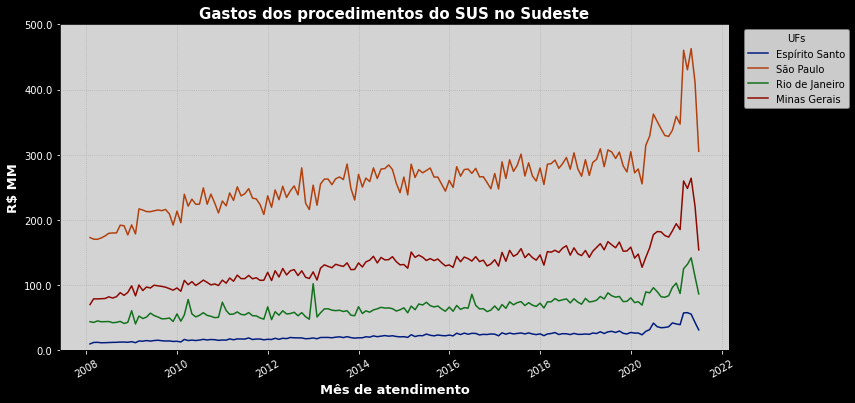

In [18]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=selecao.reset_index(), x="mes", y="gasto", hue="uf")
ax = ax
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
plt.xticks(rotation=30)
plt.ylim(0,500*escalaY)
ax.set_facecolor("lightgrey")
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1), title="UFs")
# ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.ylabel("R$ MM", fontweight="bold", color="white", fontsize=13)
plt.xlabel("Mês de atendimento", fontweight="bold", color="white", fontsize=13)
plt.grid(linestyle=":")
plt.title("Gastos dos procedimentos do SUS no Sudeste", fontweight="bold", color="white", fontsize=15)
plt.show()